In [1]:
#!pip install matplotlib==3.5.0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'
save_path = dir_path

MOGP DFs

In [3]:
# LAST GEN
path_mogp_pr10 = dir_path + 'co3_precision10_evaluation_stats_last_gen.csv'
df_mogp_p10 = pd.read_csv(path_mogp_pr10)

df_mogp_p10

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.55984,25,0.259999,0.45792,0.661759


In [4]:
# 1st gen
path_mogp_pr10_1st = dir_path + 'co3_precision10_evaluation_stats_gen_1.csv'
df_mogp_p10_1st = pd.read_csv(path_mogp_pr10_1st)

df_mogp_p10_1st

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.096849,25,0.099733,0.057753,0.135944


MOEIR DFs

In [5]:
# last gen
path_moeir_pr10 = dir_path + 'moeir_precision10_evaluation_stats_last_gen.csv'
df_moeir_p10 = pd.read_csv(path_moeir_pr10)

df_moeir_p10

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.396307,25,0.213751,0.312517,0.480097


In [6]:
# last gen
path_moeir_p10_1st = dir_path + 'moeir_precision10_evaluation_stats_gen_1.csv'
df_moeir_p10_1st = pd.read_csv(path_moeir_p10_1st)

df_moeir_p10_1st

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.053667,25,0.060438,0.029975,0.077358


[(0.0390952054294519, 0.023691690019920476), (0.1019196171027283, 0.08379022296559847)]


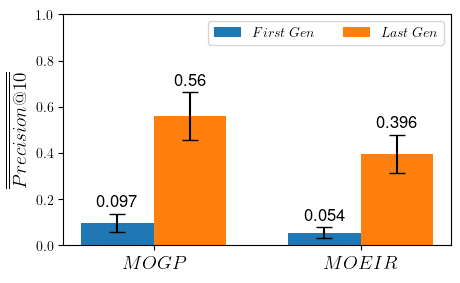

In [7]:
def IC_95(std, cant_items):
    
    return std * 1.96 / math.sqrt(cant_items)



species = ("MOGP", "MOEIR" )

penguin_means = {
    '$First \: Gen$': (round(df_mogp_p10_1st['mean_prec'][0], 3), round(df_moeir_p10_1st['mean_prec'][0], 3)),
    '$Last \: Gen$': (round(df_mogp_p10['mean_prec'][0], 3), round(df_moeir_p10['mean_prec'][0], 3)),
}

std = [(IC_95(df_mogp_p10_1st['std_prec'][0],df_mogp_p10_1st['count_prec'][0]), 
        IC_95(df_moeir_p10_1st['std_prec'][0], df_moeir_p10_1st['count_prec'][0])),
       (IC_95(df_mogp_p10['std_prec'][0], df_mogp_p10['count_prec'][0]), 
        IC_95(df_moeir_p10['std_prec'][0], df_moeir_p10['count_prec'][0]))]

print(std)
x = np.arange(len(species))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

for attribute, measurement in penguin_means.items():
    
    offset = width * multiplier
    #axs.bar('mogp', t['mean_prec'], yerr=t['std_prec'], capsize=6)
    rects = ax.bar(x + offset, measurement, width, yerr=std[multiplier], label=attribute, capsize=6)
    ax.bar_label(rects, padding=3, fontsize=12)
    multiplier += 1

ax.set_ylabel(r'$$\overline{\overline{Precision@10}}$$',fontsize=14)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(["$MOGP$", "$MOEIR$"], fontsize=14)



ax.legend(loc='upper right', ncol=2)
ax.set_ylim(0, 1)

plt.savefig(dir_path+"mogp_vs_moeir_p10.svg")
plt.show()
